# Predicting Income Above a Threshold

Author: Timothy Cho

Course Project, UC Irvine, Math 10, F23

## Introduction

We have one main goal in this section: given a set of people, and knowing a little bit about their work background (work, education, and number of hours per week), can we predict with high accuracy whether someone makes more than $50000 per year in income? Our first approach will be numerical, which is like what we did in Math 10. However, we will also explore the data using the categorical pieces we have, and we will learn how to do a classification problem, but the inputs are categorical rather than numerical.

## Setting up the Data

In this section, we import the `Adult` [dataset](https://archive.ics.uci.edu/dataset/2/adult) from the UC Irvine Machine Learning Repository and convert the data into our DataFrame `df`. Next, we clean out any missing values, so that our data will be ready for classification later.

We start by importing the necessary modules.

In [ ]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import altair as alt

Next, we load the data from the UCI repository and convert it to a `DataFrame`.

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2)
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

df = pd.DataFrame(data = X)
df['income'] = y
df.sample(20) # take a look at the data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25956,32,Private,27207,10th,6,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
20391,36,Local-gov,251091,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
171,28,State-gov,175325,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
33047,20,Private,273989,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K.
39628,36,Local-gov,254202,Prof-school,15,Divorced,Prof-specialty,Unmarried,White,Female,0,0,24,Germany,<=50K.
13797,30,Private,54929,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K
46905,33,Private,133861,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,62,United-States,<=50K.
35796,21,Private,287681,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,Mexico,<=50K.
905,46,Private,171550,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,38,United-States,<=50K
12903,50,Private,209320,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K


## Cleaning the Data

As we can see from the data sample above, our `DataFrame` `df` is quite messy, with a lot of categorical/nominal data, and very confusing categories, and with a lot of missing values. Additionally, the `df['income']` column should be binary, but the way the data is encoded makes it an object. Our goal in this section is to clean up the data, so that clearly binary categories are stored with `True`/`False` values. We will also get rid of all rows with missing values.

In [ ]:
df = df.dropna() # drops any row with a missing value

In [ ]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
15150,29,Private,213842,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
11767,38,State-gov,346766,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
1551,17,Private,130806,10th,6,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,24,United-States,<=50K
4052,31,Private,225053,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,45,United-States,<=50K
20249,80,Private,252466,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,24,United-States,<=50K
32027,46,Local-gov,140219,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,8614,0,55,United-States,>50K
18858,53,Private,96062,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1740,40,United-States,<=50K
36115,37,Private,108282,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K.
5269,59,Private,43221,9th,5,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,>50K
19163,19,Private,170800,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,60,United-States,<=50K


The `income` column has the issue that `<=50K` and `<=50K.` represent the same value (and similarly with `>50K` and `>50K.`). We now convert this row into a `True`/`False` binary column.

In [ ]:
income = df['income'].str.contains(">50K")
df['income>50k'] = income
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income>50k
31093,45,State-gov,144351,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,True
14049,38,Private,117528,Bachelors,13,Never-married,Other-service,Other-relative,White,Female,0,0,45,United-States,<=50K,False
24214,20,Private,316043,11th,7,Never-married,Other-service,Own-child,Black,Male,594,0,20,United-States,<=50K,False
35309,24,Private,99697,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,<=50K.,False
36406,55,Private,119344,HS-grad,9,Married-civ-spouse,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K.,False
15892,90,Private,88991,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,England,>50K,True
15279,52,Self-emp-inc,334273,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,65,United-States,>50K,True
23945,21,Private,163333,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,35,United-States,<=50K,False
18463,74,Private,188709,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,50,United-States,>50K,True
13845,65,?,105017,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K,False


The old `df['income']` row is useless now, so we drop it from our `DataFrame`.

In [ ]:
df = df.drop('income', axis=1)

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income>50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,False
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,False
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,False
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,False


Next, the `sex` trait is binary here, so we change that into a `True`/`False` column.

In [ ]:
sex = df['sex'].str.contains('Male')
sex
df['is-male'] = sex
df = df.drop('sex', axis=1)

In [ ]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income>50k,is-male
3275,58,Private,241056,Some-college,10,Divorced,Adm-clerical,Unmarried,White,0,0,46,United-States,False,False
22806,46,Private,403911,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Black,0,0,40,United-States,True,True
19170,52,State-gov,314627,Masters,14,Divorced,Prof-specialty,Not-in-family,Asian-Pac-Islander,0,0,40,United-States,False,False
23728,44,Private,152150,Assoc-acdm,12,Separated,Exec-managerial,Not-in-family,White,0,0,40,United-States,False,True
24312,20,State-gov,147280,HS-grad,9,Never-married,Other-service,Other-relative,Other,0,0,40,United-States,False,True
9352,41,State-gov,116520,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,0,0,40,United-States,True,True
19123,20,Private,62865,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,0,0,45,United-States,False,False
19610,22,Private,340543,HS-grad,9,Never-married,Tech-support,Not-in-family,White,0,0,40,United-States,False,False
35840,19,Private,382688,10th,6,Never-married,Handlers-cleaners,Not-in-family,White,0,0,20,United-States,False,True
38961,57,Private,157271,11th,7,Divorced,Other-service,Not-in-family,Black,0,0,54,United-States,False,True


Now, our data is ready to be analyzed.

## Time Investment versus Income: Logistic Regression

In this section, we examine if a person's education level and the number of hours they work determine whether they make more than $50000 a year. This is just a regular binary classification problem like we have been doing in Math 10; we will later use the categorical data to make classifications, and we will see new things when we get there.

Intuitively, we should expect that the more hours worked and the higher the education level, the person's income is more likely to be above $50000. That is, the more time they take to do things like educate themselves/go to work, the higher we expcet their income to be. Let us see if this is actually the case.

### Visualizing the Data

Unfortunately, our dataset is far too large for Deepnote to render output. To remedy this, we will plot a few different plots by randomly taking `500` samples `5` times.

In [ ]:
cols = ['education-num', 'hours-per-week'] # these are the columns we are interested in
rng = np.random.default_rng(seed=63)
seed_list = [rng.integers(1, 10**6) for i in range(5)]

In [ ]:
n = 500
circ_size = 60
chart_list = []
# generate our 5 randomized charts
for s in seed_list:
    chart_list.append(alt.Chart(df.sample(n, random_state=s)).mark_circle(size=circ_size).encode(
        x = cols[0],
        y = cols[1],
        color = 'income>50k:N'
        ).properties(title=f'Education Level/Hours per Week, 500 samples, seed={s}'))

In [ ]:
alt.hconcat(*chart_list)

alt.HConcatChart(...)

As we can see, there seems to be a slight correlation between the `education-num` and the income: we see more orange points towards the right of the chart. On the other had, the number of hours worked per week does not seem to affect whether someone makes more than $50000. Now, let us implement logistic regression to see the exact correlations.

### Analysis

We now fit our data to the logistic regression model. We will let 90% of the data be training data, and the remaining 10% be testing data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
clf = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['income>50k'], test_size=0.1, random_state=63)
clf.fit(X_train, y_train)

LogisticRegression()

Let us see some information about what we got for `clf`. Remember that we set `cols = ['education-num', 'hours-per-week']`.

In [ ]:
clf.classes_

array([False,  True])

In [ ]:
clf.coef_

array([[0.34405795, 0.0401318 ]])

In [ ]:
clf.intercept_

array([-6.49326522])

The above tells us that if $x_1$ is the education level, and $x_2$ is the number of hours worked per week, the probability that someone gets paid over \$50000 a month is given approximately by the function $$f(x_1, x_2) =\displaystyle \frac 1{1+\exp(-0.339x_1 - 0.040x_2 + 6.428)}$$. Now, let us see how well our model performs on the test data.

In [ ]:
clf.score(X_test, y_test)

0.7772412345160613

The performance of our model is not bad, but also not great: we might be overfitting slightly, and the correlation was not as strong as what we might have intuitively expected. Looking back to the charts we made, it seemed as if the number of hours worked barely had an effect on the income. What if we tried removing the number of hours column and running regression again?

In [ ]:
clf2 = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(df[['education-num']], df['income>50k'], test_size=0.1, random_state=63)
clf2.fit(X_train, y_train)

LogisticRegression()

For this new model, we see that the coefficient for the education level is still around `0.35`:

In [ ]:
clf2.coef_

array([[0.36081249]])

In [ ]:
clf2.intercept_

array([-4.97816245])

How well does this perform on the test set?

In [ ]:
clf2.score(X_test, y_test)

0.7753516691161033

This was around the same as when we had the number of hours worked. Hence, there might be a correlation between education level and a person's income, but this correlation seems a lot weaker than we expected. What if we approach this dataset using the categorical data instead?

## Types of Education versus Income: A Categorical Approach

In the last section, we saw that when we plugged in the education level of a person (`education-num`), our models were able to predict with around 77% accuracy whether a person made more than $50000 a year. This is much better than random guessing, but 77% accuracy does not suggest a very strong correlation. However, one thing that the `education-num` column leaves out is the **type** of school the person went to: for example, we would expect a PhD to have different job opportunities than someone who went to a professional training school; however, this information is completely missing from the numeric data we were provided. What if we can get a stronger correlation using the categorical `education` column instead?

Of course, we cannot use logistic regression here, as our inputs are nominal data. Additionally, we have a second problem, as the standard `DecisionTreeClassifier` we learned in Math 10, which we plan to use, [does not normally accept](https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree) categorical data, so we cannot directly fit the `education` column into `clf`. Instead, we use the `pandas` method `get_dummies` to convert our `education` data into a set of [binary variables](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), so that the `DecisionTreeClassifier` could properly process them. This technique is known as [**one-hot encoding**](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Making Our Data Understandable to `DecisionTreeClassifier`: One-Hot Encoding

In the code below, we one-hot encode our `education` data. Notice that each unique entry in the `education` column becomes its own column in the `DataFrame` below, and each `1` corresponds to what the original category was in the original `DataFrame`.

In [ ]:
encoded = pd.get_dummies(df['education'])
encoded

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
48837,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
48839,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
48840,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Analysis

Now, our data is ready to be analyzed. There is one slight technicality that we need to be careful with: notice that that `encoded` from above is a `DataFrame` in its own right, so our source data should be drawn from `encoded`, but our prediction target is in the column `df['income>50k']`. We will set the `max_depth` of our classifier `clf` to be `4` to prevent overfitting.

In [ ]:
clf3 = DecisionTreeClassifier(max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(encoded, df['income>50k'], test_size=0.1, random_state=60)

In [ ]:
clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Let us visualize how our classifier makes decisions below. We will actually write a function for this, as we will be repeating the same code a lot later on. The code below for plotting the decision tree was taken from the [class notes](https://yutongo.github.io/UCI_MATH10_F23/intro.html).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# function to visualize decision tree
def plot(classifier):
    classes = [str(cls) for cls in classifier.classes_]
    plot_tree(classifier, 
                feature_names=classifier.feature_names_in_,
                class_names=classes,
                filled=True)

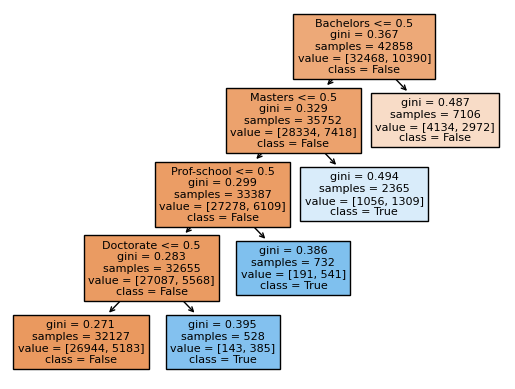

In [ ]:
plot(clf3)

We should remember that each category in the `education` column is mutually exclusive. Hence, this means that the decision tree's decisions seem logical to us: the tree first checks if the person's highest education level is a Bachelor's. If this is probably not the case, then the tree checks for higher and higher degrees, until the Doctorate. Then, if they tree thinks that the person does not hold any of the degrees it checks, it renders a `False` decision.

Now, let us check its accuracy on the test set.

In [ ]:
clf3.score(X_test, y_test)

0.7751417174049968

This accuracy is almost the same as when we did the logistic regression. Hence, we see that no matter if we do things categorically or numerically, in this area of education, we were able to predict with around 77% accuracy whether a person made more than $50000 a year. Hence, we are confident in saying that there is a slight correlation between education and income. We also see a curiosity: the accuracy scores between our decision tree and our logistic classifier were equal up to the third decimal place. It seems like the decision tree behaved a lot like the logistic classifier in this case.

## Does the Job Worked Affect Income?

In this short section, we apply our techniques from the previous section to see if it is really true that the type of job that you work determines the amount of money you might make.

### Preparing Our Data

As before, we need to one-hot encode our data in order to use `DecisionTreeClassifier`.

In [ ]:
encoded = pd.get_dummies(df['occupation'])
encoded

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48837,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48839,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48840,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


We have a slight issue here: one of the columns in our one-hot `encoded` data is labeled `?`, which does not seem to be particularly useful to what we are doing. Hence, we are justified in dropping that column, which cleans the data.

In [ ]:
encoded = encoded.drop("?", axis=1)

Now, our data is ready for analysis.

### Analysis

We do the same steps as we did in the previous section.

In [ ]:
clf4 = DecisionTreeClassifier(max_depth=6)
X_train, X_test, y_train, y_test = train_test_split(encoded, df['income>50k'], test_size=0.1, random_state=57)
clf4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

Let us take a look at how the decisions were made.

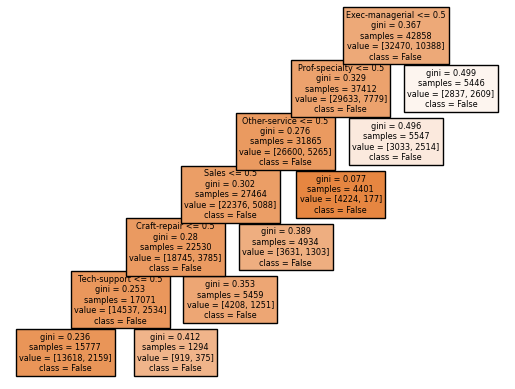

In [ ]:
plot(clf4)

Immediately, we should see that something is off about the way decisions are being made: the machine renders a `False` decision for every job. This suggests to us that occupation is not a great way to determine someone's income, at least for the jobs mentioned here. However, there are still patterns: the machine is less sure about its `False` decision when the probablity of being in a executive/managerial or a professional/specialty position is at least `0.5`, which kind of makes sense. Let us see the classifier's score on the test data.

In [ ]:
clf4.score(X_test, y_test)

0.7579256770942683

Surprisingly, the machine does a lot better when it assigns `False` decisions to everyone when compared to randomly guessing with `50%` probability of being correct. However, the correlation between job type and income still seems to be slight, rather than actually predictable.

## Conclusion

In this dataset, we saw two factors that have some impact on the income: the job worked and the education level. However, the correlation we got seemed to be sort of weak in both cases: our accuracy on the test data was around 75% to 77%, which is better than making a 50/50 guess at whether someone makes more than $50000 a year, but still not great in comparison to some of the examples we saw in class. However, we still expect there to be a correlation. If we had a dataset that gave the income as a **numeric** value, we would expect a regression model to have higher accuracy, as the accuracy of that is judged by mean squared error instead. Hence, our conclusion is that while classification does seem to work out okay here, this problem is much better addressed by a regression model, where we predict the income directly instead of determining whether it passes a certain threshold.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)? [UCI ML Repository](https://archive.ics.uci.edu/dataset/2/adult)

* List any other references that you found helpful. [Class notes](https://yutongo.github.io/UCI_MATH10_F23/intro.html); all other sources are linked above.